In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from pandas_profiling import ProfileReport

In [5]:
l1=['22:35','22:35 June 5']
data=pd.DataFrame(l1,columns=['Arrival_Time'])
data[['Arrival_time1','Arrivaltime2','Date']]= data.Arrival_Time.str.split(expand=True)

In [6]:
data

Arrival_Time Arrival_time1 Arrivaltime2  Date
0         22:35         22:35         None  None
1  22:35 June 5         22:35         June     5

In [2]:
df=pd.read_excel("Train.xlsx")

In [3]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

In [6]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-01-05   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-09-06     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-12-05   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-01-03  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [7]:
df[['Hours','Minutes']]= df.Duration.str.split(expand=True)

In [8]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-01-05   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-09-06     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-12-05   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-01-03  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price Hours  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897    2h   
1    05:50         13:15   7h 25m     2 stops         No info   7662    7h   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   19h   
3    18:05         23:30   5h 25m      1 stop         No info   6218    5h   
4    16:50         21:35   4h 45m      1 stop         No info  13302    4h   

  Minutes  
0     50m  
1     25m  
2    None  
3     25m  
4     45m

In [9]:
df['Minutes'].replace(np.nan,'0',inplace=True)
df['Hours'].replace(np.nan,'0',inplace=True)


In [10]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-01-05   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-09-06     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-12-05   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-01-03  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price Hours  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897    2h   
1    05:50         13:15   7h 25m     2 stops         No info   7662    7h   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   19h   
3    18:05         23:30   5h 25m      1 stop         No info   6218    5h   
4    16:50         21:35   4h 45m      1 stop         No info  13302    4h   

  Minutes  
0     50m  
1     25m  
2       0  
3     25m  
4     45m

In [11]:
df['Hours']=[x[:-1] for x in df['Hours'] if x!='0']



In [12]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-01-05   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-09-06     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-12-05   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-01-03  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price Hours  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897     2   
1    05:50         13:15   7h 25m     2 stops         No info   7662     7   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882    19   
3    18:05         23:30   5h 25m      1 stop         No info   6218     5   
4    16:50         21:35   4h 45m      1 stop         No info  13302     4   

  Minutes  
0     50m  
1     25m  
2       0  
3     25m  
4     45m

In [13]:
minutes=[]
for x in df['Minutes']:
    if x=='0':
        minutes.append(x)
    else:
        minutes.append(x[:-1])

In [14]:
df['Minutes']=minutes

In [15]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-01-05   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-09-06     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-12-05   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-01-03  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price Hours  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897     2   
1    05:50         13:15   7h 25m     2 stops         No info   7662     7   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882    19   
3    18:05         23:30   5h 25m      1 stop         No info   6218     5   
4    16:50         21:35   4h 45m      1 stop         No info  13302     4   

  Minutes  
0      50  
1      25  
2       0  
3      25  
4      45

In [16]:
df['Total_Stops'].replace('non-stop','0',inplace=True)
df['Total_Stops'].replace('1 stop','1',inplace=True)
df['Total_Stops'].replace('2 stops','2',inplace=True)
df['Total_Stops'].replace('3 stops','3',inplace=True)
df['Total_Stops'].replace('4 stops','4',inplace=True)

In [17]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-01-05   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-09-06     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-12-05   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-01-03  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price Hours  \
0    22:20  01:10 22 Mar   2h 50m           0         No info   3897     2   
1    05:50         13:15   7h 25m           2         No info   7662     7   
2    09:25  04:25 10 Jun      19h           2         No info  13882    19   
3    18:05         23:30   5h 25m           1         No info   6218     5   
4    16:50         21:35   4h 45m           1         No info  13302     4   

  Minutes  
0      50  
1      25  
2       0  
3      25  
4      45

In [18]:
df[['Dep_Hours','Dep_Minutes']]= df.Dep_Time.str.split(':',expand=True)

In [19]:
df[['Arrival_time1','Arrivaltime2','Date']]= df.Arrival_Time.str.split(expand=True)

In [20]:
df=df.drop(['Arrivaltime2','Date'],axis=1)

In [21]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-01-05   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-09-06     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-12-05   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-01-03  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price Hours  \
0    22:20  01:10 22 Mar   2h 50m           0         No info   3897     2   
1    05:50         13:15   7h 25m           2         No info   7662     7   
2    09:25  04:25 10 Jun      19h           2         No info  13882    19   
3    18:05         23:30   5h 25m           1         No info   6218     5   
4    16:50         21:35   4h 45m           1         No info  13302     4   

  Minutes Dep_Hours Dep_Minutes Arrival_time1  
0      50        22          20         01:10  
1      25        05          50         13:15  
2       0        09          25         04:25  
3      25        18          05         23:30  
4      45        16          50         21:35

In [22]:
df[['Arrival_Hours','Arrival_Minutes']]= df.Arrival_time1.str.split(':',expand=True)

In [23]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-01-05   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-09-06     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-12-05   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-01-03  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price Hours  \
0    22:20  01:10 22 Mar   2h 50m           0         No info   3897     2   
1    05:50         13:15   7h 25m           2         No info   7662     7   
2    09:25  04:25 10 Jun      19h           2         No info  13882    19   
3    18:05         23:30   5h 25m           1         No info   6218     5   
4    16:50         21:35   4h 45m           1         No info  13302     4   

  Minutes Dep_Hours Dep_Minutes Arrival_time1 Arrival_Hours Arrival_Minutes  
0      50        22          20         01:10            01              10  
1      25        05          50         13:15            13              15  
2       0        09          25         04:25            04              25  
3      25        18          05         23:30            23              30  
4      45        16          50         21:35            21              35

In [24]:
df=df.drop(['Dep_Time','Arrival_Time','Route','Duration','Additional_Info','Arrival_time1'],axis=1)

In [25]:
df.head()

Airline Date_of_Journey    Source Destination Total_Stops  Price Hours  \
0       IndiGo      2019-03-24  Banglore   New Delhi           0   3897     2   
1    Air India      2019-01-05   Kolkata    Banglore           2   7662     7   
2  Jet Airways      2019-09-06     Delhi      Cochin           2  13882    19   
3       IndiGo      2019-12-05   Kolkata    Banglore           1   6218     5   
4       IndiGo      2019-01-03  Banglore   New Delhi           1  13302     4   

  Minutes Dep_Hours Dep_Minutes Arrival_Hours Arrival_Minutes  
0      50        22          20            01              10  
1      25        05          50            13              15  
2       0        09          25            04              25  
3      25        18          05            23              30  
4      45        16          50            21              35

In [26]:
def str_to_int(d,df):
    return pd.to_numeric(df[d])

In [27]:
df['Dep_Hours']=str_to_int("Dep_Hours",df)
df['Dep_Minutes']=str_to_int("Dep_Minutes",df)
df['Arrival_Hours']=str_to_int("Arrival_Hours",df)
df['Arrival_Minutes']=str_to_int("Arrival_Minutes",df)
df['Hours']=str_to_int("Hours",df)
df['Minutes']=str_to_int("Minutes",df)

In [28]:
df['Total_Stops']=str_to_int("Total_Stops",df)

In [29]:
P_d=[]
for x in df['Dep_Hours']:
    if x>=5 and x<12:
        P_d.append("Morning")
    elif x>=12 and x<17:
        P_d.append("Afternoon")
    elif x>=17 and x<20:
        P_d.append("Evening")
    else:
        P_d.append("Night")


In [30]:
df['Part of the Day Dep']=P_d

In [31]:
df.head()

Airline Date_of_Journey    Source Destination  Total_Stops  Price  \
0       IndiGo      2019-03-24  Banglore   New Delhi          0.0   3897   
1    Air India      2019-01-05   Kolkata    Banglore          2.0   7662   
2  Jet Airways      2019-09-06     Delhi      Cochin          2.0  13882   
3       IndiGo      2019-12-05   Kolkata    Banglore          1.0   6218   
4       IndiGo      2019-01-03  Banglore   New Delhi          1.0  13302   

   Hours  Minutes  Dep_Hours  Dep_Minutes  Arrival_Hours  Arrival_Minutes  \
0      2       50         22           20              1               10   
1      7       25          5           50             13               15   
2     19        0          9           25              4               25   
3      5       25         18            5             23               30   
4      4       45         16           50             21               35   

  Part of the Day Dep  
0               Night  
1             Morning  
2             Morning  
3             Evening  
4           Afternoon

In [32]:
df['Part of the Day Dep'].value_counts().plot.bar()
plt.show()

<ipython-input-32-055a18499134>:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [47]:
P_a=[]
for x in df['Arrival_Hours']:
    if x>=5 and x<12:
        P_a.append("Morning")
    elif x>=12 and x<17:
        P_a.append("Afternoon")
    elif x>=17 and x<20:
        P_a.append("Evening")
    else:
        P_a.append("Night")


In [48]:
df['Part of the Day Arr']=P_a

In [49]:
df.head()

Airline Date_of_Journey    Source Destination Total_Stops  Price  \
0       IndiGo      2019-03-24  Banglore   New Delhi           0   3897   
1    Air India      2019-01-05   Kolkata    Banglore           2   7662   
2  Jet Airways      2019-09-06     Delhi      Cochin           2  13882   
3       IndiGo      2019-12-05   Kolkata    Banglore           1   6218   
4       IndiGo      2019-01-03  Banglore   New Delhi           1  13302   

   Hours  Minutes  Dep_Hours  Dep_Minutes  Arrival_Hours  Arrival_Minutes  \
0      2       50         22           20              1               10   
1      7       25          5           50             13               15   
2     19        0          9           25              4               25   
3      5       25         18            5             23               30   
4      4       45         16           50             21               35   

  Part of the Day Dep Part of the Day Arr  
0               Night               Night  
1             Morning           Afternoon  
2             Morning               Night  
3             Evening               Night  
4           Afternoon               Night

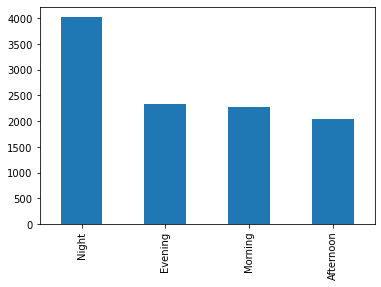

In [50]:
df['Part of the Day Arr'].value_counts().plot.bar()
plt.show()

In [59]:
cat_features=[x for x in df.columns if df[x].dtype=='O']

In [60]:
cat_features

['Airline',
 'Source',
 'Destination',
 'Part of the Day Dep',
 'Part of the Day Arr']

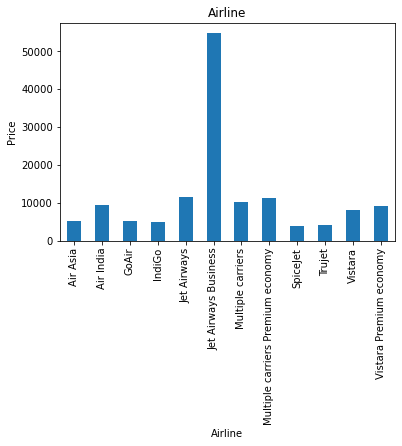

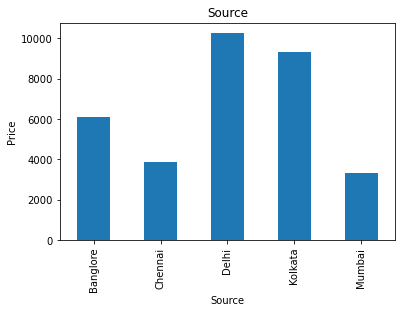

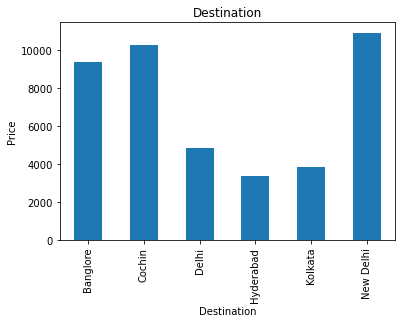

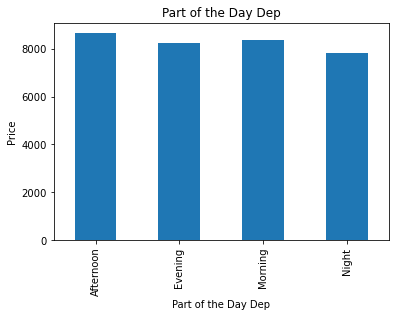

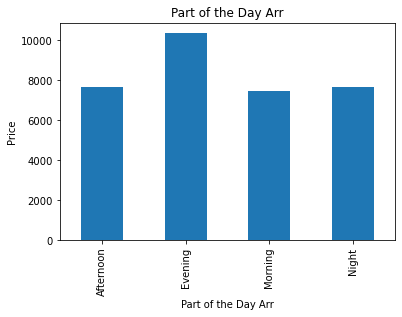

In [62]:
for x in cat_features:
    df2=df.copy()
    df2.groupby(x)['Price'].median().plot.bar()
    plt.xlabel(x)
    plt.ylabel('Price')
    plt.title(x)
    plt.show()

In [63]:
df.drop(['Dep_Hours','Dep_Minutes','Arrival_Hours','Arrival_Minutes'],axis=1,inplace=True)

In [64]:
df.head()

Airline Date_of_Journey    Source Destination  Total_Stops  Price  \
0       IndiGo      2019-03-24  Banglore   New Delhi          0.0   3897   
1    Air India      2019-01-05   Kolkata    Banglore          2.0   7662   
2  Jet Airways      2019-09-06     Delhi      Cochin          2.0  13882   
3       IndiGo      2019-12-05   Kolkata    Banglore          1.0   6218   
4       IndiGo      2019-01-03  Banglore   New Delhi          1.0  13302   

   Hours  Minutes Part of the Day Dep Part of the Day Arr  
0      2       50               Night               Night  
1      7       25             Morning           Afternoon  
2     19        0             Morning               Night  
3      5       25             Evening               Night  
4      4       45           Afternoon               Night

In [66]:
month=[]
for x in df['Date_of_Journey']:
    y=str(x)
    month.append(y[6:7])
    
    

In [69]:
df['Months']=month

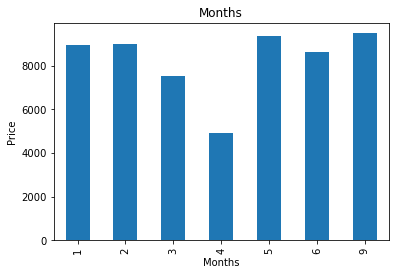

In [71]:
df.groupby('Months')['Price'].median().plot.bar()
plt.xlabel('Months')
plt.ylabel('Price')
plt.title('Months')
plt.show()

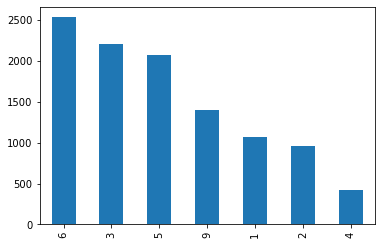

In [93]:
df['Months'].value_counts().plot.bar()
plt.show()

In [72]:
df.head()

Airline Date_of_Journey    Source Destination  Total_Stops  Price  \
0       IndiGo      2019-03-24  Banglore   New Delhi          0.0   3897   
1    Air India      2019-01-05   Kolkata    Banglore          2.0   7662   
2  Jet Airways      2019-09-06     Delhi      Cochin          2.0  13882   
3       IndiGo      2019-12-05   Kolkata    Banglore          1.0   6218   
4       IndiGo      2019-01-03  Banglore   New Delhi          1.0  13302   

   Hours  Minutes Part of the Day Dep Part of the Day Arr Months  
0      2       50               Night               Night      3  
1      7       25             Morning           Afternoon      1  
2     19        0             Morning               Night      9  
3      5       25             Evening               Night      2  
4      4       45           Afternoon               Night      1

In [85]:
day=[]
for x in df['Date_of_Journey']:
    y=str(x)
    day.append(y[8:10])

In [86]:
df['day']=day
df.head()

Airline Date_of_Journey    Source Destination  Total_Stops  Price  \
0       IndiGo      2019-03-24  Banglore   New Delhi          0.0   3897   
1    Air India      2019-01-05   Kolkata    Banglore          2.0   7662   
2  Jet Airways      2019-09-06     Delhi      Cochin          2.0  13882   
3       IndiGo      2019-12-05   Kolkata    Banglore          1.0   6218   
4       IndiGo      2019-01-03  Banglore   New Delhi          1.0  13302   

   Hours  Minutes Part of the Day Dep Part of the Day Arr Months day  
0      2       50               Night               Night      3  24  
1      7       25             Morning           Afternoon      1  05  
2     19        0             Morning               Night      9  06  
3      5       25             Evening               Night      2  05  
4      4       45           Afternoon               Night      1  03

In [87]:
df['day']=str_to_int('day',df)

In [88]:
df.head()

Airline Date_of_Journey    Source Destination  Total_Stops  Price  \
0       IndiGo      2019-03-24  Banglore   New Delhi          0.0   3897   
1    Air India      2019-01-05   Kolkata    Banglore          2.0   7662   
2  Jet Airways      2019-09-06     Delhi      Cochin          2.0  13882   
3       IndiGo      2019-12-05   Kolkata    Banglore          1.0   6218   
4       IndiGo      2019-01-03  Banglore   New Delhi          1.0  13302   

   Hours  Minutes Part of the Day Dep Part of the Day Arr Months  day  
0      2       50               Night               Night      3   24  
1      7       25             Morning           Afternoon      1    5  
2     19        0             Morning               Night      9    6  
3      5       25             Evening               Night      2    5  
4      4       45           Afternoon               Night      1    3

In [89]:
month_part=[]
for x in df['day']:
    if x<=7:
        month_part.append("First week")
    elif x<=14:
        month_part.append("Second Week")
    elif x<=21:
        month_part.append("Third Week")
    else:
        month_part.append("Last Week")

In [90]:
df['month_part']=month_part

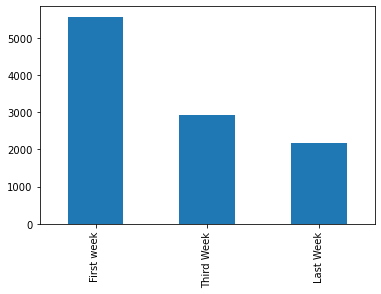

In [91]:
df['month_part'].value_counts().plot.bar()
plt.show()

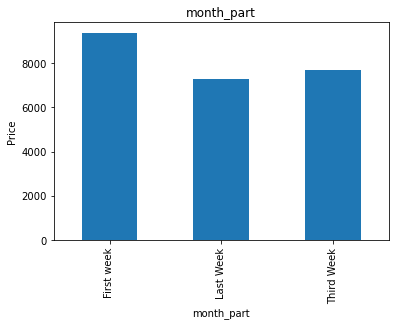

In [92]:
df.groupby('month_part')['Price'].median().plot.bar()
plt.xlabel('month_part')
plt.ylabel('Price')
plt.title('month_part')
plt.show()

In [96]:
le=LabelEncoder()
df['Airline']=le.fit_transform(df['Airline'])
df['Source']=le.fit_transform(df['Source'])
df['Destination']=le.fit_transform(df['Destination'])
df['Part of the Day Dep']=le.fit_transform(df['Part of the Day Dep'])
df['Part of the Day Arr']=le.fit_transform(df['Part of the Day Arr'])
df['month_part']=le.fit_transform(df['month_part'])

In [97]:
df.head()

Airline Date_of_Journey  Source  Destination  Total_Stops  Price  Hours  \
0        3      2019-03-24       0            5          0.0   3897      2   
1        1      2019-01-05       3            0          2.0   7662      7   
2        4      2019-09-06       2            1          2.0  13882     19   
3        3      2019-12-05       3            0          1.0   6218      5   
4        3      2019-01-03       0            5          1.0  13302      4   

   Minutes  Part of the Day Dep  Part of the Day Arr Months  day  month_part  
0       50                    3                    3      3   24           1  
1       25                    2                    0      1    5           0  
2        0                    2                    3      9    6           0  
3       25                    1                    3      2    5           0  
4       45                    0                    3      1    3           0

In [99]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [100]:
df.head()

Airline  Source  Destination  Total_Stops  Price  Hours  Minutes  \
0        3       0            5          0.0   3897      2       50   
1        1       3            0          2.0   7662      7       25   
2        4       2            1          2.0  13882     19        0   
3        3       3            0          1.0   6218      5       25   
4        3       0            5          1.0  13302      4       45   

   Part of the Day Dep  Part of the Day Arr Months  day  month_part  
0                    3                    3      3   24           1  
1                    2                    0      1    5           0  
2                    2                    3      9    6           0  
3                    1                    3      2    5           0  
4                    0                    3      1    3           0

<AxesSubplot:>

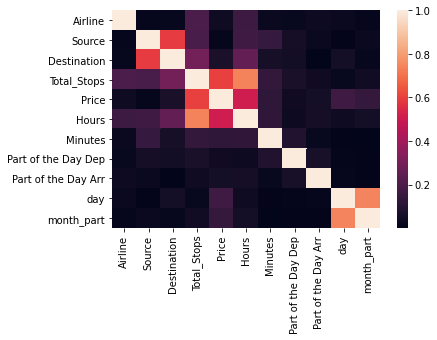

In [101]:
corr=df.corr()
corr=abs(corr)
sn=sns.heatmap(corr)
sn

In [104]:
pf=ProfileReport(df)
pf

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]